Importing data


**Importing and Combining Data**

The bird monitoring dataset is provided as an Excel file containing multiple sheets, with each sheet representing observations from a different habitat type. To prepare the data for analysis, the following steps were performed:

File Loading: The Excel file Bird_Monitoring_Data_FOREST.XLSX was loaded using Pandas.

Sheet Extraction: All sheet names were retrieved to understand the available habitat-specific datasets.

Data Consolidation: Data from each sheet was read into a dictionary and then combined into a single DataFrame.

Habitat Column Addition: While merging, a new column (Sheet) was temporarily added to indicate the source sheet (habitat type) for each record.

Column Removal: The Sheet column was later dropped to simplify the dataset for further analysis.

This step ensured that all bird observations were stored in a single, clean DataFrame, making it easier to apply uniform cleaning and analysis procedures in the next stages.

In [13]:
import pandas as pd
# Specify the file path
file_path = "Bird_Monitoring_Data_FOREST.XLSX"

# Read the Excel file with multiple sheets
excel_data = pd.ExcelFile(file_path)

# Get all sheet names
sheet_names = excel_data.sheet_names

# Read data from all sheets into a dictionary
sheets_dict = {sheet: excel_data.parse(sheet) for sheet in sheet_names}

In [14]:
# Example: Convert sheets_dict to a single DataFrame; this will add a new sheet column at the last.
combined_df = pd.concat(
    [df.assign(Sheet=sheet_name) for sheet_name, df in sheets_dict.items()],
    ignore_index=True
)

In [15]:
# later u can Drop the 'Sheet' column
combined_df = combined_df.drop(columns=['Sheet'])

In [16]:
file_path_forest = "Bird_Monitoring_Data_FOREST (1).XLSX"


**Uploading Files to Google Colab**

The project uses bird monitoring data from two different habitat types — Forest and Grassland. Since the data is stored locally, the files.upload() method from google.colab was used to manually upload the datasets into the Colab environment.

For this step:

Both Excel files (Bird_Monitoring_Data_FOREST.XLSX and Bird_Monitoring_Data_GRASSLAND.XLSX) were uploaded simultaneously.

The upload interface allows selecting multiple files, which are then stored in the Colab session’s temporary storage for further processing.

In [8]:
from google.colab import files

# Upload both files here (Forest & Grassland)
uploaded = files.upload()


Saving Bird_Monitoring_Data_FOREST.XLSX to Bird_Monitoring_Data_FOREST.XLSX
Saving Bird_Monitoring_Data_GRASSLAND.XLSX - ANTI.csv to Bird_Monitoring_Data_GRASSLAND.XLSX - ANTI.csv


In [17]:
file_path_grassland = "Bird_Monitoring_Data_GRASSLAND.XLSX - ANTI.csv"
grassland_df = pd.read_csv(file_path_grassland)
grassland_df['Location_Type'] = 'Grassland'


In [31]:
import pandas as pd

# Load Forest Excel File
forest_file = 'Bird_Monitoring_Data_FOREST.XLSX'  # Replace with actual file name if different
excel_data = pd.ExcelFile(forest_file)
combined_df = pd.concat([excel_data.parse(sheet) for sheet in excel_data.sheet_names], ignore_index=True)

# Load Grassland CSV File
grassland_df = pd.read_csv('Bird_Monitoring_Data_GRASSLAND.XLSX - ANTI.csv')  # Replace with actual file name if different

# Add Location Type Columns
combined_df['Location_Type'] = 'Forest'
grassland_df['Location_Type'] = 'Grassland'

# Combine both into final_df
final_df = pd.concat([combined_df, grassland_df], ignore_index=True)



In [18]:
# Check total number of rows and columns
print("Total Rows:", final_df.shape[0])
print("Total Columns:", final_df.shape[1])

# Check number of records per Location Type
print(final_df['Location_Type'].value_counts())


Total Rows: 12134
Total Columns: 31
Location_Type
Forest       8546
Grassland    3588
Name: count, dtype: int64


1)Data cleaning - null values   
2)Duplicates - drop_duplicates()
3)Drop unnecessary columns
4) Additional columns
final df--> transfer to sql

Check for Missing (Null) Values


In [ ]:
# Check null values in each column
final_df.isnull().sum()


,0
Admin_Unit_Code,0
Sub_Unit_Code,11412
Site_Name,3588
Plot_Name,0
Location_Type,0
Year,0
Date,0
Start_Time,0
End_Time,0
Observer,0


Handle Missing Values
For Numerical Columns (e.g., Temperature, Humidity)

In [19]:
final_df['Temperature'] = final_df['Temperature'].fillna(final_df['Temperature'].mean())
final_df['Humidity'] = final_df['Humidity'].fillna(final_df['Humidity'].mean())


For Categorical Columns (e.g., Sex, ID_Method)


In [20]:
final_df['Sex'] = final_df['Sex'].fillna('Unknown')
final_df['ID_Method'] = final_df['ID_Method'].fillna('Unknown')
final_df['Flyover_Observed'] = final_df['Flyover_Observed'].fillna('False')
final_df['PIF_Watchlist_Status'] = final_df['PIF_Watchlist_Status'].fillna('False')


Remove Duplicates

In [21]:
# Drop duplicate rows if any
final_df = final_df.drop_duplicates()


Drop Unnecessary Columns

In [22]:
# Example: Drop any 'Unnamed' columns that came while importing
final_df = final_df.loc[:, ~final_df.columns.str.contains('^Unnamed')]


Ensure Correct Data Types

In [23]:
# Convert 'Date' column to datetime
final_df['Date'] = pd.to_datetime(final_df['Date'], errors='coerce')

# Ensure numerical columns are correct
final_df['Temperature'] = pd.to_numeric(final_df['Temperature'], errors='coerce')
final_df['Humidity'] = pd.to_numeric(final_df['Humidity'], errors='coerce')


 Verify Final Cleaned Data

In [24]:
# Check again for nulls
final_df.isnull().sum()

# View cleaned data sample
final_df.head()


,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,TaxonCode,Previously_Obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN


Before proceeding to Exploratory Data Analysis (EDA), it is essential to clean and preprocess the dataset to ensure the accuracy and reliability of insights. The following data cleaning steps are performed:

Checking for Missing Values:
We first check for null (missing) values across all columns to identify data quality issues that need to be addressed.

Handling Missing Values:

For numerical columns such as Temperature and Humidity, missing values are filled using the column's mean.

For categorical columns like Sex, ID_Method, Flyover_Observed, and PIF_Watchlist_Status, missing values are filled with placeholders like 'Unknown' or 'False' to maintain consistency.

Removing Duplicates:
Duplicate rows, if any, are removed to prevent skewed analysis results.

Converting Date Column to Datetime Format:
The Date column is converted to a standard datetime format which is crucial for any time-series or trend analysis in EDA.

Dropping Unnecessary Columns:
Any columns that are automatically generated during file import (like columns named 'Unnamed') are dropped as they do not add value to the analysis.

Final Verification of Cleaned Data:
After performing the cleaning operations, we re-check for missing values to ensure data consistency and display a few rows of the cleaned dataset for confirmation.



In [25]:
# 1. Check for null values
print(final_df.isnull().sum())

# 2. Handle Missing Values
# Numerical columns (Temperature, Humidity)
final_df['Temperature'] = final_df['Temperature'].fillna(final_df['Temperature'].mean())
final_df['Humidity'] = final_df['Humidity'].fillna(final_df['Humidity'].mean())

# Categorical columns (Sex, ID_Method, Flyover_Observed, etc.)
final_df['Sex'] = final_df['Sex'].fillna('Unknown')
final_df['ID_Method'] = final_df['ID_Method'].fillna('Unknown')
final_df['Flyover_Observed'] = final_df['Flyover_Observed'].fillna('False')
final_df['PIF_Watchlist_Status'] = final_df['PIF_Watchlist_Status'].fillna('False')

# 3. Drop Duplicates
final_df = final_df.drop_duplicates()

# 4. Convert Date to datetime type
final_df['Date'] = pd.to_datetime(final_df['Date'], errors='coerce')

# 5. Drop 'Unnamed' columns if any
final_df = final_df.loc[:, ~final_df.columns.str.contains('^Unnamed')]

# 6. Verify Cleaned Data
print(final_df.isnull().sum())
final_df.head()


Admin_Unit_Code                    0
Sub_Unit_Code                  10954
Site_Name                       3130
Plot_Name                          0
Location_Type                      0
Year                               0
Date                               0
Start_Time                         0
End_Time                           0
Observer                           0
Visit                              0
Interval_Length                    0
ID_Method                          0
Distance                         282
Flyover_Observed                   0
Sex                                0
Common_Name                        0
Scientific_Name                    0
AcceptedTSN                       24
NPSTaxonCode                    3130
AOU_Code                           0
PIF_Watchlist_Status               0
Regional_Stewardship_Status        0
Temperature                        0
Humidity                           0
Sky                                0
Wind                               0
D

,Admin_Unit_Code,Sub_Unit_Code,Site_Name,Plot_Name,Location_Type,Year,Date,Start_Time,End_Time,Observer,...,PIF_Watchlist_Status,Regional_Stewardship_Status,Temperature,Humidity,Sky,Wind,Disturbance,Initial_Three_Min_Cnt,TaxonCode,Previously_Obs
0,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,True,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN
1,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,True,NaN,NaN
2,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN
3,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN
4,ANTI,NaN,ANTI 1,ANTI-0036,Forest,2018,2018-05-22,06:19:00,06:29:00,Elizabeth Oswald,...,False,False,19.9,79.400002,Cloudy/Overcast,Calm (< 1 mph) smoke rises vertically,No effect on count,False,NaN,NaN


**Top 10 Most Observed Bird Species**

This bar chart shows the top 10 bird species that were observed the most across all locations.
It helps in identifying which species are most common and frequently sighted in the surveyed areas.
This insight is useful for understanding dominant species presence and biodiversity health.
If some species are observed much more frequently than others, it indicates their strong adaptation to the environment.

/tmp/ipython-input-3909976683.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_species.values, y=top_species.index, palette='viridis')


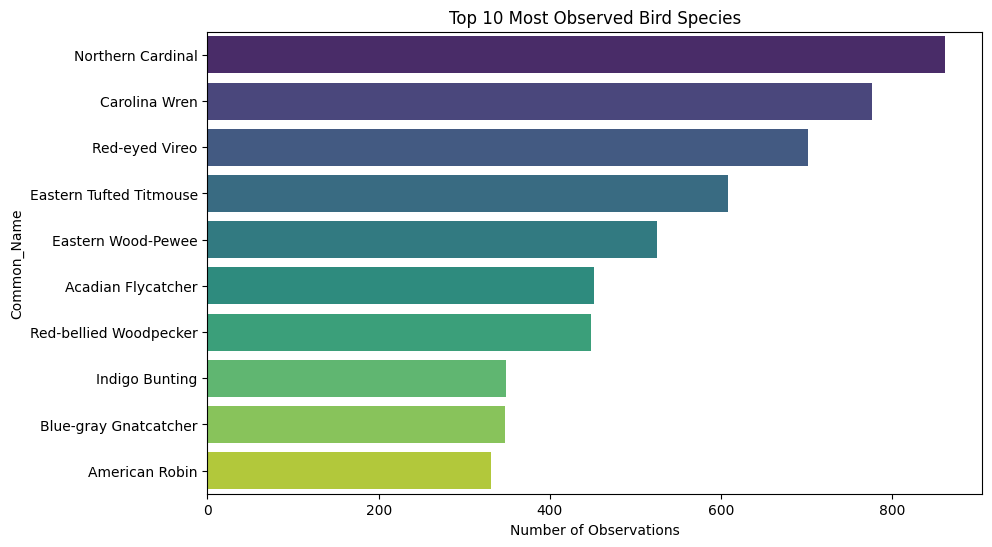

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

top_species = final_df['Common_Name'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_species.values, y=top_species.index, palette='viridis')
plt.title('Top 10 Most Observed Bird Species')
plt.xlabel('Number of Observations')
plt.show()


**Monthly Observation Trends**

This line chart displays the month-wise trend of bird observations.
It helps us understand in which months bird activity is highest and when it drops.
Seasonal changes such as spring or autumn migration patterns may cause a spike in observations.
This information is essential for planning bird watching activities, conservation efforts, and studying seasonal behavior of birds.

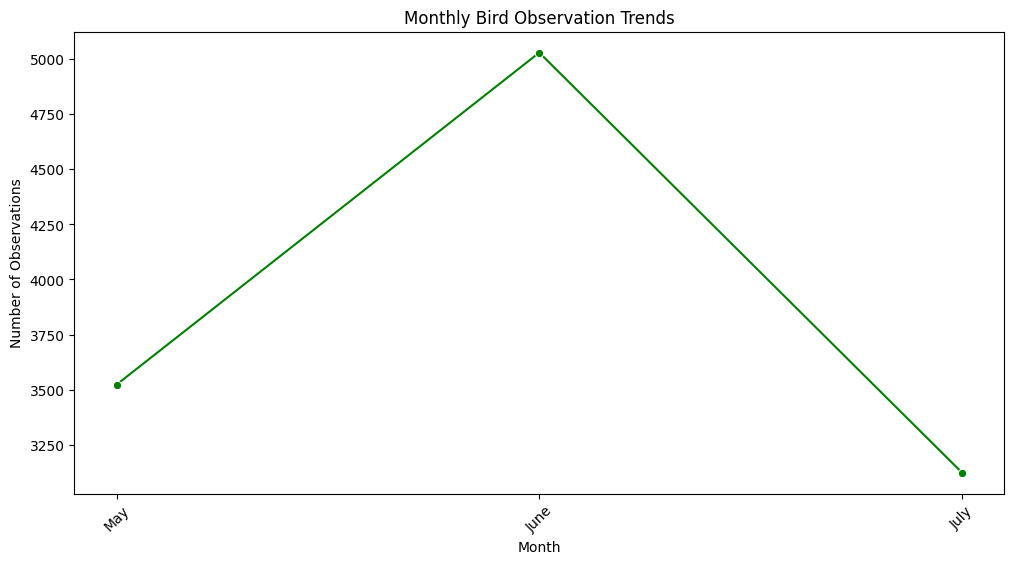

In [ ]:
final_df['Month'] = final_df['Date'].dt.month_name()

monthly_trend = final_df['Month'].value_counts().reindex([
    'January','February','March','April','May','June','July','August','September','October','November','December'
])

plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_trend.index, y=monthly_trend.values, marker='o', color='green')
plt.title('Monthly Bird Observation Trends')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()


**Species Diversity in Forest vs Grassland**

This visualization compares the number of unique bird species found in forest habitats vs grassland habitats.
It gives a clear picture of which ecosystem supports higher species diversity.
For example, if forests show higher species counts, it indicates they are a more favorable habitat due to better resources (trees, cover, food).
This is crucial for habitat conservation decisions and biodiversity protection planning.

/tmp/ipython-input-2756980261.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=species_diversity.index, y=species_diversity.values, palette='magma')


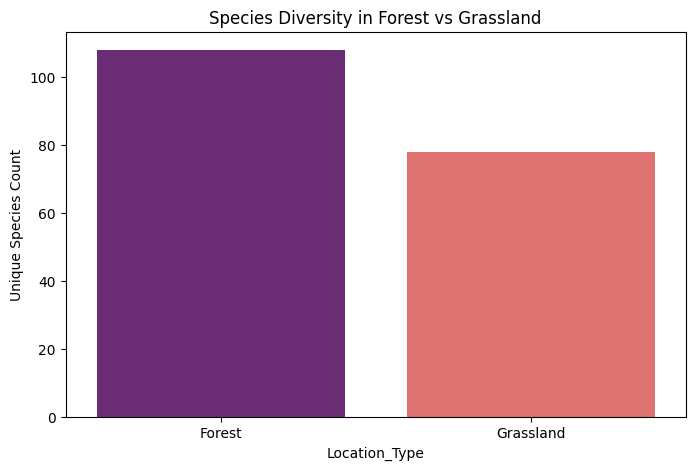

In [ ]:
species_diversity = final_df.groupby('Location_Type')['Scientific_Name'].nunique()

plt.figure(figsize=(8,5))
sns.barplot(x=species_diversity.index, y=species_diversity.values, palette='magma')
plt.title('Species Diversity in Forest vs Grassland')
plt.ylabel('Unique Species Count')
plt.show()


**Flyover Observations (Birds Flying Overhead)**

This bar chart shows how often birds were observed flying overhead (Flyovers) versus when they were seen perched or stationary.
If flyovers are less, it indicates most bird species were engaging in ground-level or stationary activities during observation.
This behavior helps in understanding bird activity patterns, feeding habits, and migration behaviors.
High flyover counts may indicate active migration periods or specific species' flight habits.



/tmp/ipython-input-3334290416.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=flyover_counts.index, y=flyover_counts.values, palette='coolwarm')


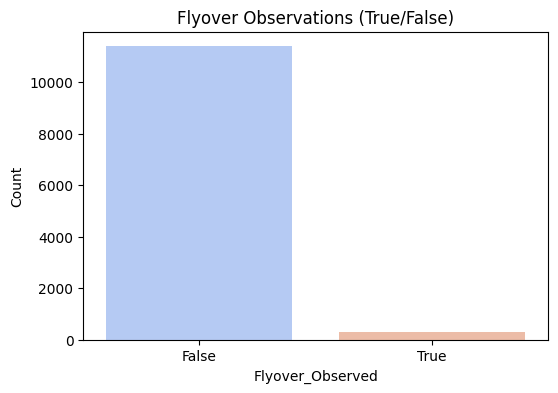

In [ ]:
flyover_counts = final_df['Flyover_Observed'].value_counts()

plt.figure(figsize=(6,4))
sns.barplot(x=flyover_counts.index, y=flyover_counts.values, palette='coolwarm')
plt.title('Flyover Observations (True/False)')
plt.ylabel('Count')
plt.show()


**Top Observers by Observation Count**

This bar chart displays the top 10 observers who recorded the highest number of bird observations.
It helps in understanding data contribution by each observer and identifying any observer bias or expertise level.
If some observers have significantly more records, their observation techniques or visit frequency might influence the data.
This insight is important to ensure balanced data collection efforts.

/tmp/ipython-input-4093676694.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_observers.values, y=top_observers.index, palette='cubehelix')


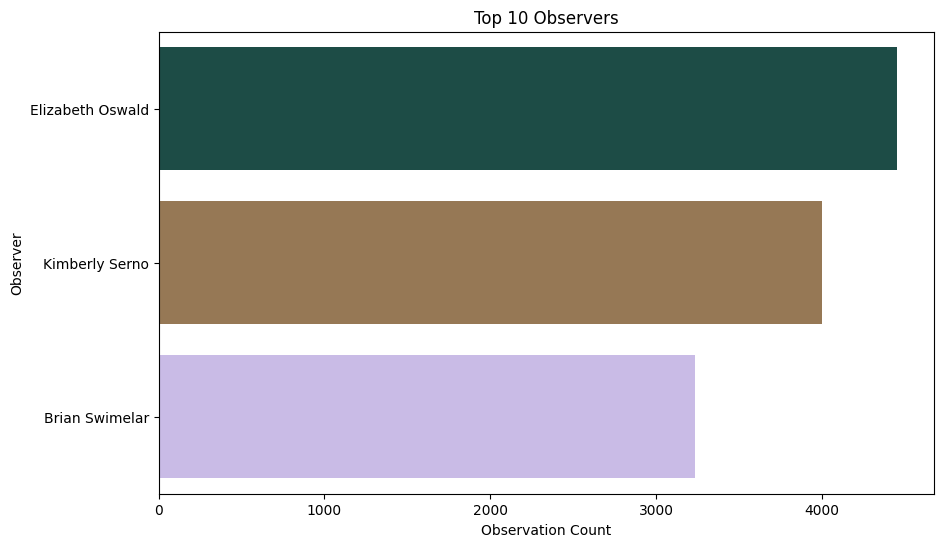

In [ ]:
top_observers = final_df['Observer'].value_counts().head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_observers.values, y=top_observers.index, palette='cubehelix')
plt.title('Top 10 Observers')
plt.xlabel('Observation Count')
plt.show()


**Species Preference for Distance from Observer**

Insight: Identify which species prefer staying close to observers (e.g., ≤50 meters) vs those who are more shy and stay distant.

Use Case: Understand species' comfort levels, behavioral patterns, and adjust observation methods accordingly.

Visualization: Bar chart of species count per distance category.

/tmp/ipython-input-821057899.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=distance_counts.index, y=distance_counts.values, palette='Blues')


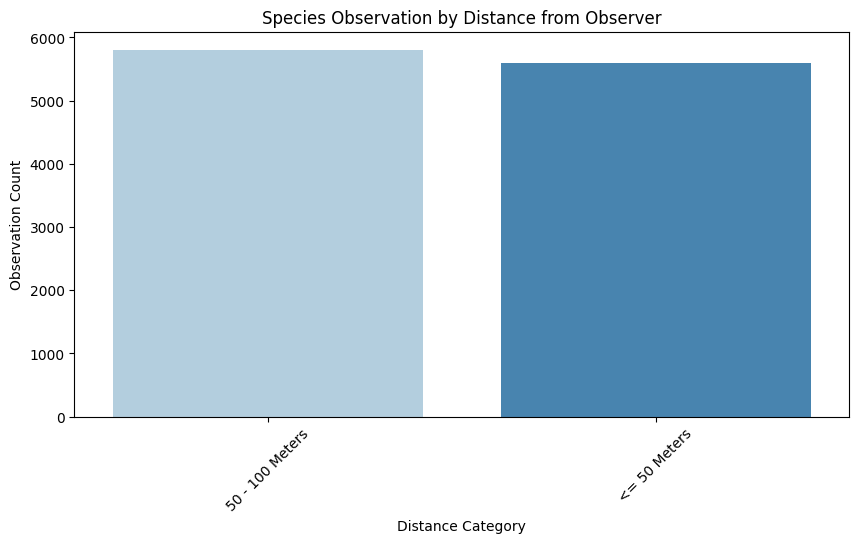

In [ ]:
distance_counts = final_df['Distance'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=distance_counts.index, y=distance_counts.values, palette='Blues')
plt.title('Species Observation by Distance from Observer')
plt.xlabel('Distance Category')
plt.ylabel('Observation Count')
plt.xticks(rotation=45)
plt.show()


**Disturbance Impact on Bird Sightings**

Insight: Analyze how environmental disturbances (like noise, human activity) affect bird counts.

Use Case: Useful for conservation teams to minimize disturbances in critical habitats.

Visualization: Compare bird counts grouped by Disturbance levels (No Effect, Slight Effect, Major Effect).

/tmp/ipython-input-1582747677.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disturbance_counts.index, y=disturbance_counts.values, palette='autumn')


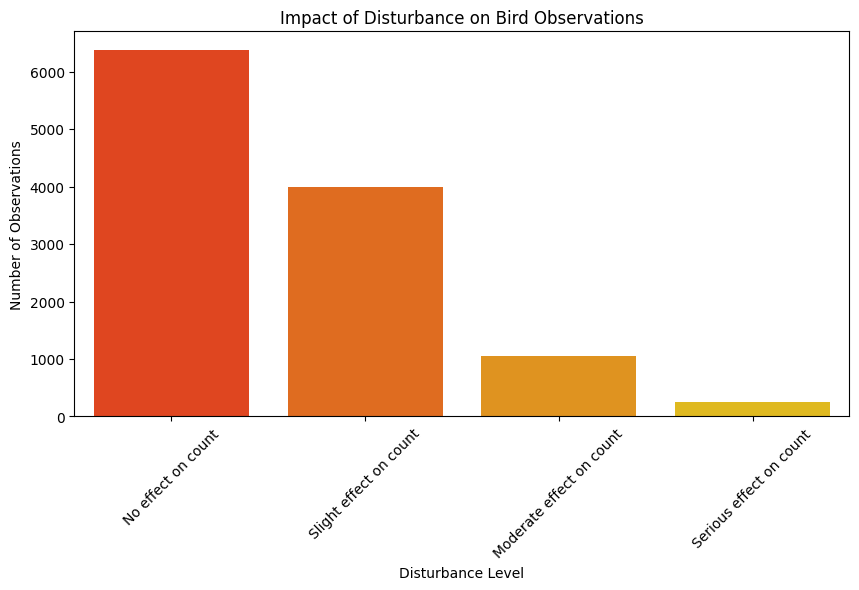

In [ ]:
disturbance_counts = final_df['Disturbance'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=disturbance_counts.index, y=disturbance_counts.values, palette='autumn')
plt.title('Impact of Disturbance on Bird Observations')
plt.xlabel('Disturbance Level')
plt.ylabel('Number of Observations')
plt.xticks(rotation=45)
plt.show()


**Species on PIF Watchlist & Conservation Focus**

Insight: Highlight species that are on the Partners In Flight (PIF) Watchlist (at-risk species).

Use Case: Supports biodiversity conservation efforts by identifying vulnerable species needing urgent attention.

Visualization: Pie chart showing proportion of observations that are Watchlist species vs Non-Watchlist

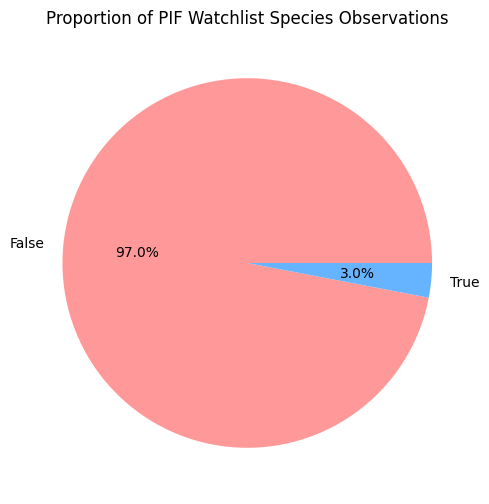

In [ ]:
watchlist_counts = final_df['PIF_Watchlist_Status'].value_counts()

plt.figure(figsize=(6,6))
plt.pie(watchlist_counts, labels=watchlist_counts.index, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Proportion of PIF Watchlist Species Observations')
plt.show()


**Top Biodiversity Hotspots (Plot-Level Analysis)**

Insight: Find which plots/sites have the highest species diversity.

Use Case: Important for eco-tourism development and habitat preservation focus.

Visualization: Bar chart or map plot showing species count per plot.

/tmp/ipython-input-2937830711.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=plot_species_diversity.values, y=plot_species_diversity.index, palette='Spectral')


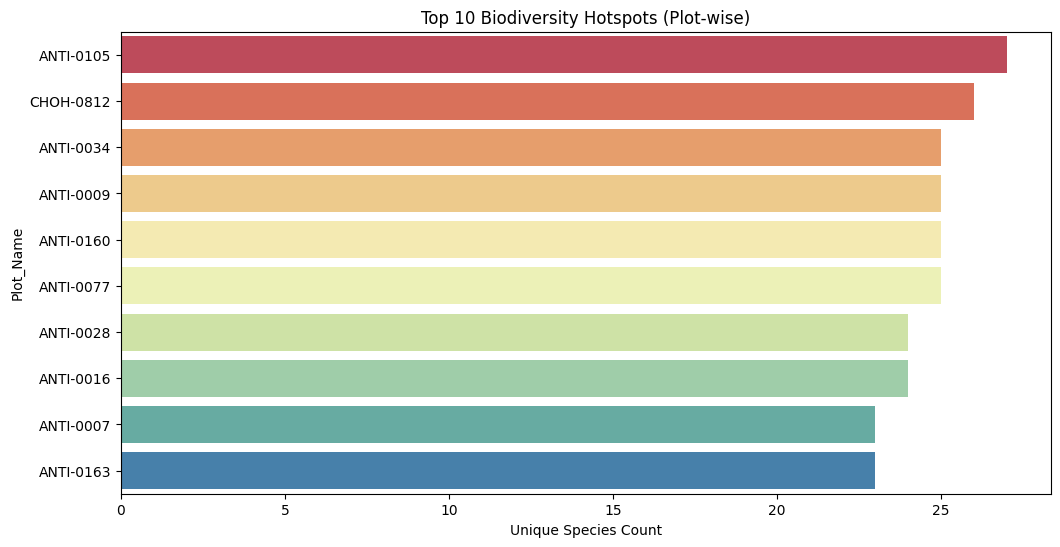

In [ ]:
plot_species_diversity = final_df.groupby('Plot_Name')['Scientific_Name'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(12,6))
sns.barplot(x=plot_species_diversity.values, y=plot_species_diversity.index, palette='Spectral')
plt.title('Top 10 Biodiversity Hotspots (Plot-wise)')
plt.xlabel('Unique Species Count')
plt.show()


**Observer Bias Analysis**

Insight: Identify if certain observers are reporting significantly higher counts or specific species.

Use Case: Helps ensure data collection is balanced and unbiased.

Visualization: Observer-wise comparison of species diversity & counts.

/tmp/ipython-input-4219563505.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=observer_species_diversity.values, y=observer_species_diversity.index, palette='viridis')


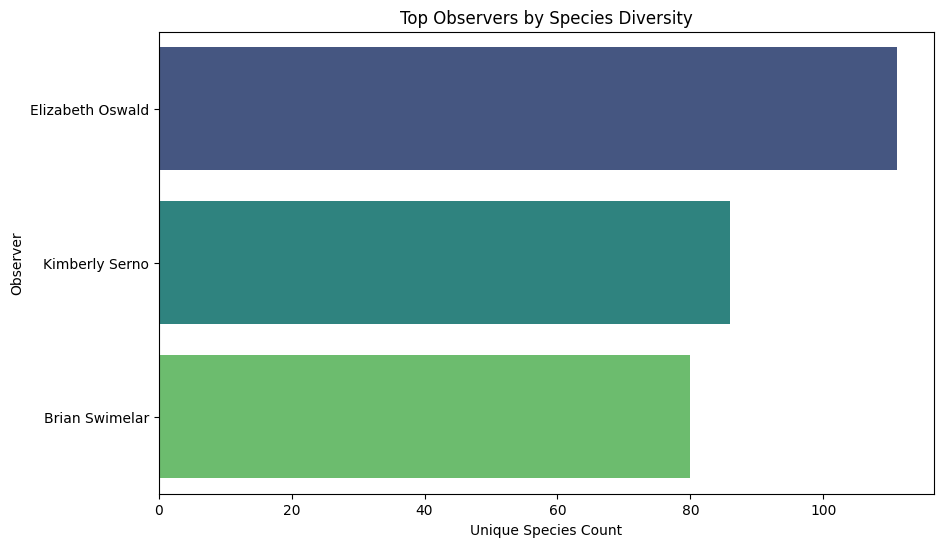

In [ ]:
observer_species_diversity = final_df.groupby('Observer')['Scientific_Name'].nunique().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=observer_species_diversity.values, y=observer_species_diversity.index, palette='viridis')
plt.title('Top Observers by Species Diversity')
plt.xlabel('Unique Species Count')
plt.show()


**Weather Condition Impact (Sky, Wind) on Bird Activity**

Insight: Analyze how cloudy, clear, windy, or calm weather conditions influence bird visibility.

Use Case: Helps in planning optimal survey times and understanding bird behavior under varying conditions.

Visualization: Grouped bar chart — Weather Condition vs Observation Count.

/tmp/ipython-input-1721834217.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=sky_condition_counts.index, y=sky_condition_counts.values, palette='cool')


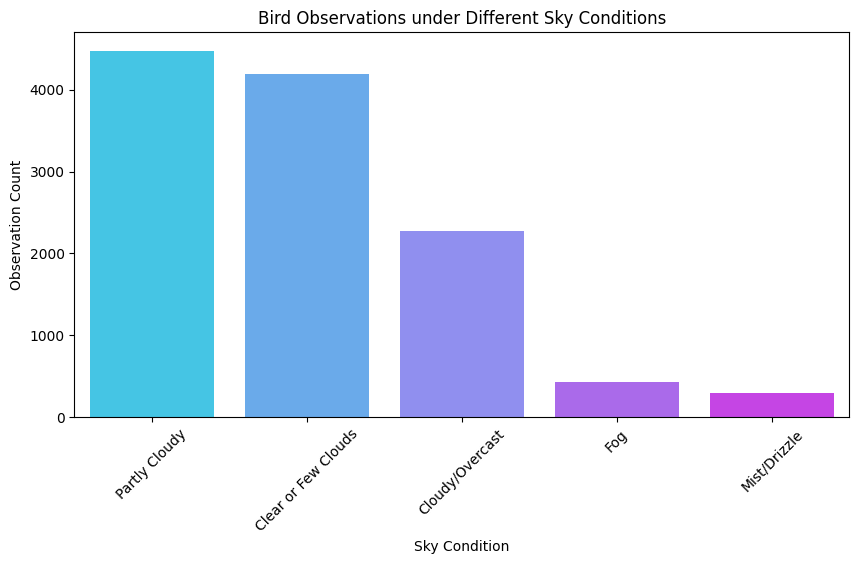

In [ ]:
sky_condition_counts = final_df['Sky'].value_counts()

plt.figure(figsize=(10,5))
sns.barplot(x=sky_condition_counts.index, y=sky_condition_counts.values, palette='cool')
plt.title('Bird Observations under Different Sky Conditions')
plt.xlabel('Sky Condition')
plt.ylabel('Observation Count')
plt.xticks(rotation=45)
plt.show()


**Species Abundance vs. Rarity (Common vs. Rare Species)**

Insight: Identify which species are very commonly observed and which are rarely sighted.

Use Case: Helps in highlighting species that might need special conservation attention.

Visualization: Histogram showing species count distribution (long-tail distribution).

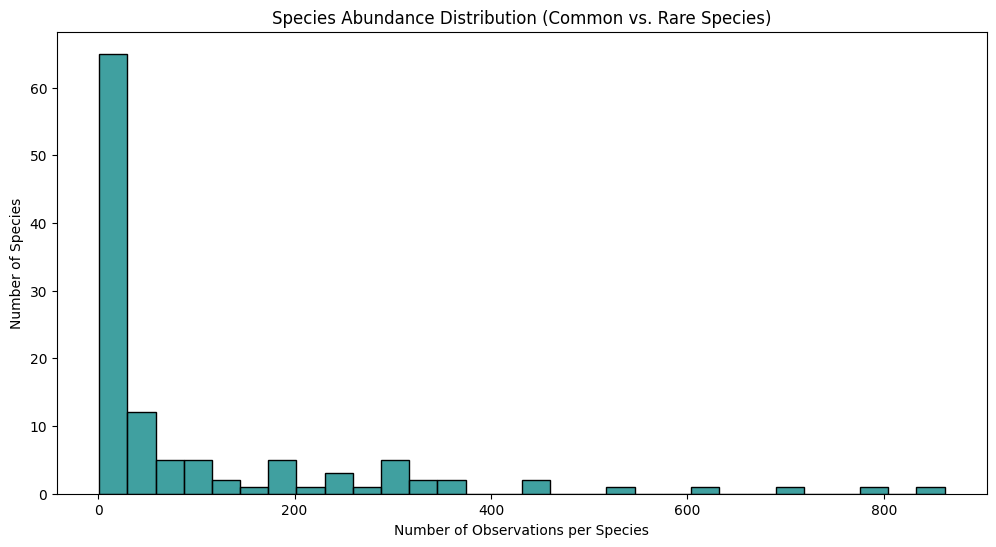

In [ ]:
species_counts = final_df['Common_Name'].value_counts()

plt.figure(figsize=(12,6))
sns.histplot(species_counts.values, bins=30, kde=False, color='teal')
plt.title('Species Abundance Distribution (Common vs. Rare Species)')
plt.xlabel('Number of Observations per Species')
plt.ylabel('Number of Species')
plt.show()


**Habitat-Specific Species (Forest-Only vs Grassland-Only Species)**

Insight: Identify species that are observed exclusively in Forest or only in Grassland.

Use Case: Important for understanding habitat preference and ecosystem dependency.

Visualization: Venn Diagram or Separate Lists/Counts.

In [ ]:
# Get unique species per Location_Type
forest_species = set(final_df[final_df['Location_Type'] == 'Forest']['Common_Name'])
grassland_species = set(final_df[final_df['Location_Type'] == 'Grassland']['Common_Name'])

# Species exclusive to each habitat
forest_only_species = forest_species - grassland_species
grassland_only_species = grassland_species - forest_species

print(f"Forest-Only Species Count: {len(forest_only_species)}")
print(f"Grassland-Only Species Count: {len(grassland_only_species)}")


Forest-Only Species Count: 38
Grassland-Only Species Count: 8


**Observer Contribution to Species Diversity (Observer Skill Analysis)**

Insight: Analyze which observers are contributing to higher species diversity rather than just high observation counts.

Use Case: Recognize skilled observers and reduce observer bias.

Visualization: Scatter plot (Observation Count vs Species Diversity per Observer).

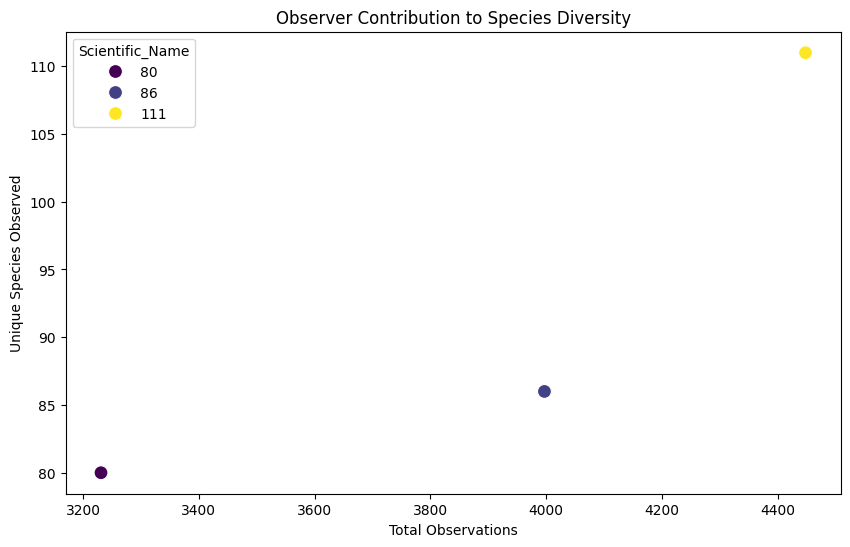

In [ ]:
observer_diversity = final_df.groupby('Observer')['Scientific_Name'].nunique()
observer_counts = final_df['Observer'].value_counts()

plt.figure(figsize=(10,6))
sns.scatterplot(x=observer_counts, y=observer_diversity, hue=observer_diversity, palette='viridis', s=100)
plt.title('Observer Contribution to Species Diversity')
plt.xlabel('Total Observations')
plt.ylabel('Unique Species Observed')
plt.show()


**Correlation Between Environmental Factors and Bird Count**

Insight: Analyze how Temperature, Humidity, Sky conditions affect bird observation counts.

Use Case: To understand bird behavior in varying weather conditions.

Visualization: Correlation Heatmap or Scatter Plots.

/tmp/ipython-input-661990691.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  env_factors['Bird_Count'] = 1  # Add a count column for aggregation


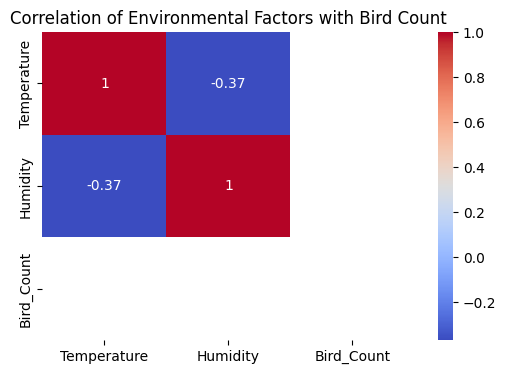

In [ ]:
env_factors = final_df[['Temperature', 'Humidity']]
env_factors['Bird_Count'] = 1  # Add a count column for aggregation

correlation = env_factors.corr()

plt.figure(figsize=(6,4))
sns.heatmap(correlation, annot=True, cmap='coolwarm')
plt.title('Correlation of Environmental Factors with Bird Count')
plt.show()




**Species Count vs Disturbance Levels (Sensitive Species Detection)**

Insight: Identify species that are less likely to be observed in high disturbance areas.

Use Case: Important for habitat protection zones.

Visualization: Stacked bar chart of Species Count by Disturbance Level.

/tmp/ipython-input-1433135570.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x='Disturbance', order=final_df['Disturbance'].value_counts().index, palette='Set2')


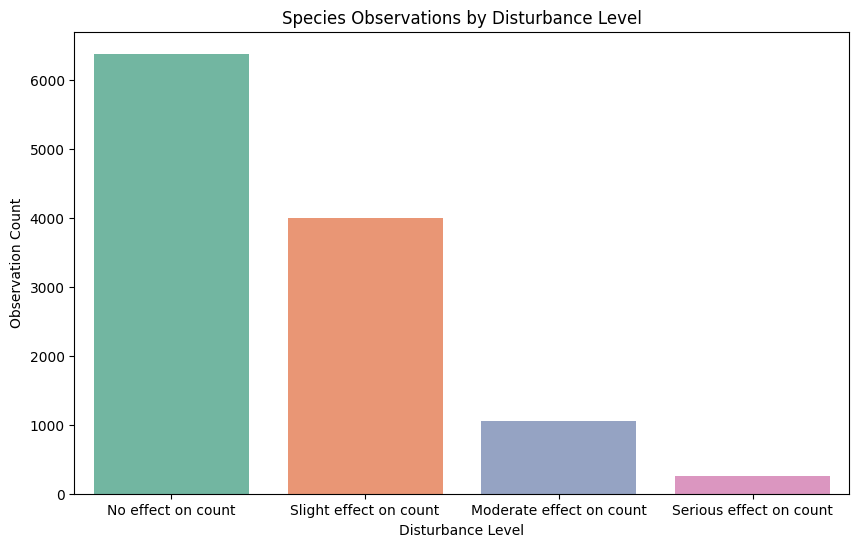

In [ ]:
plt.figure(figsize=(10,6))
sns.countplot(data=final_df, x='Disturbance', order=final_df['Disturbance'].value_counts().index, palette='Set2')
plt.title('Species Observations by Disturbance Level')
plt.xlabel('Disturbance Level')
plt.ylabel('Observation Count')
plt.show()


**Flight vs Non-Flight Behavior Pattern by Species**

Insight: Determine which species are mostly seen flying overhead (Flyovers) vs those seen stationary.

Use Case: Helps in classifying active flyers vs ground-feeders vs perching species.

Visualization: Grouped bar chart (Species vs Flyover Frequency).

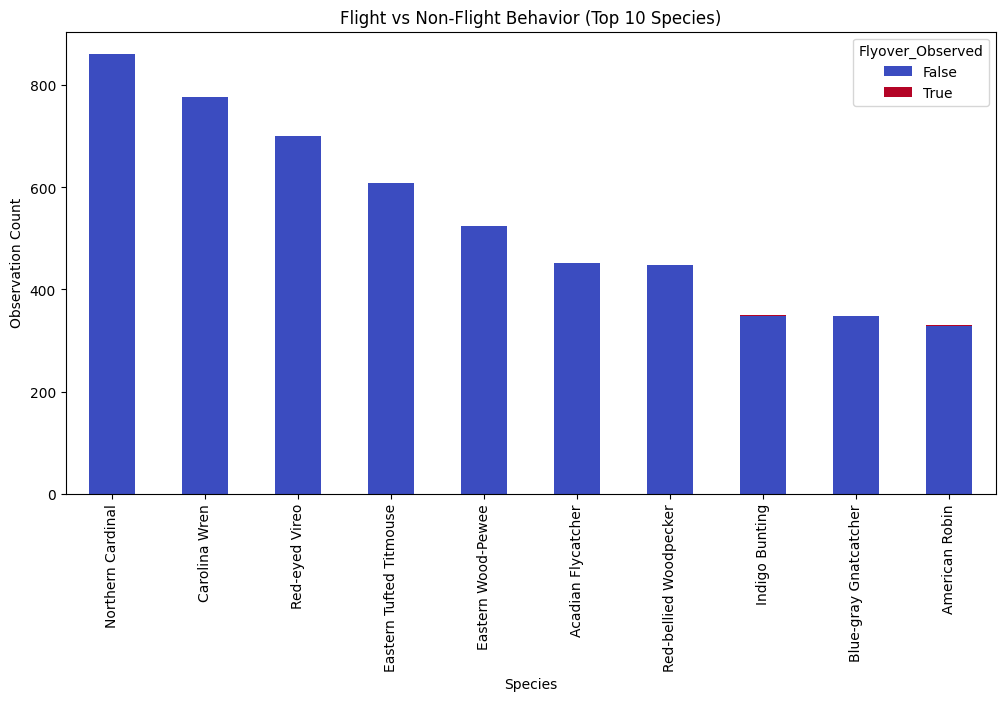

In [ ]:
# Group by Species and Flyover Observation status
flyover_species = final_df.groupby('Common_Name')['Flyover_Observed'].value_counts().unstack(fill_value=0)

# Get Top 10 Species by total observation counts
top_species = flyover_species.sum(axis=1).sort_values(ascending=False).head(10).index

# Filter Data for Top 10 Species
flyover_species_top10 = flyover_species.loc[top_species]

# Plot (columns taken dynamically no hardcoding 'True'/'False')
flyover_species_top10.plot(kind='bar', stacked=True, figsize=(12,6), colormap='coolwarm')
plt.title('Flight vs Non-Flight Behavior (Top 10 Species)')
plt.xlabel('Species')
plt.ylabel('Observation Count')
plt.show()


**Species Observation Trends by Weather Conditions (Sky & Wind Combined)**

Insight:
Analyze how combinations of Sky Conditions (Clear, Cloudy, Overcast) and Wind Levels (Calm, Breezy, Windy) affect bird observation counts.

Helps understand how environmental factors together impact bird visibility/activity.

Visualization:
Heatmap of Sky Condition vs Wind Level showing observation density.

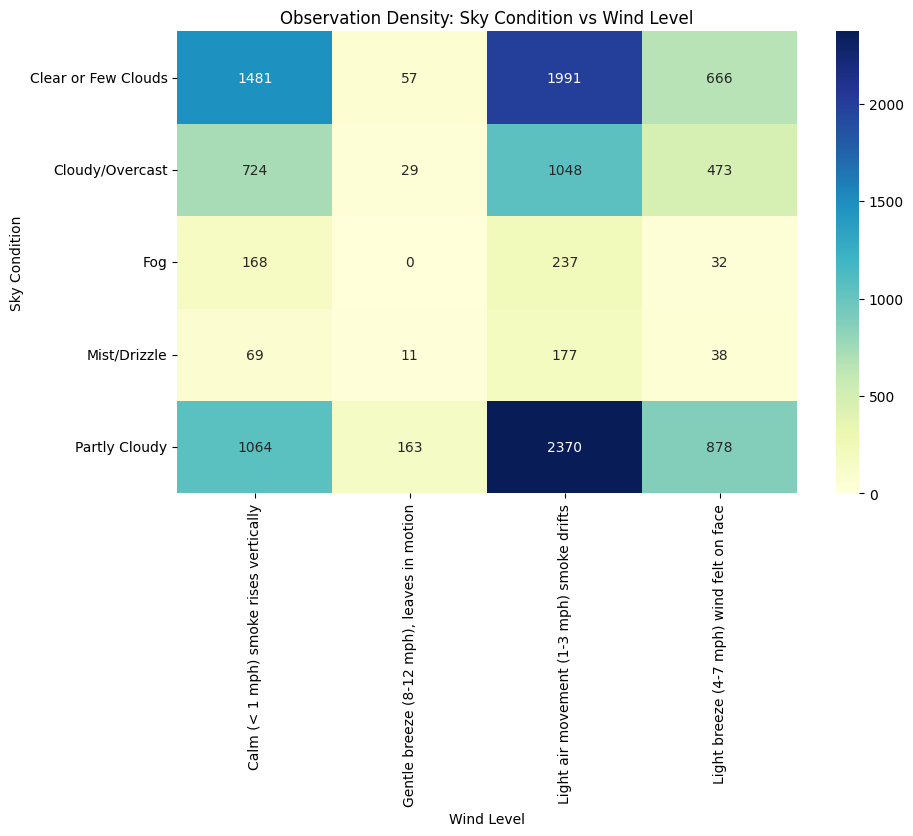

In [ ]:
# Create a Pivot Table for Sky Condition vs Wind Level
weather_pivot = final_df.pivot_table(index='Sky', columns='Wind', values='Common_Name', aggfunc='count', fill_value=0)

# Plot Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(weather_pivot, annot=True, cmap='YlGnBu', fmt='d')
plt.title('Observation Density: Sky Condition vs Wind Level')
plt.xlabel('Wind Level')
plt.ylabel('Sky Condition')
plt.show()


**Biodiversity Index (Shannon Diversity Index) per Plot**

Insight:
Calculate Shannon Diversity Index for each Plot/Site.

Unlike simple species counts, this measures both richness & evenness, giving a true biodiversity score.

Helps identify plots with most balanced ecosystems.

Visualization:
Bar Chart of Shannon Index per Plot (Top 10 plots).

/tmp/ipython-input-3537854015.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=shannon_per_plot.values, y=shannon_per_plot.index, palette='cubehelix')


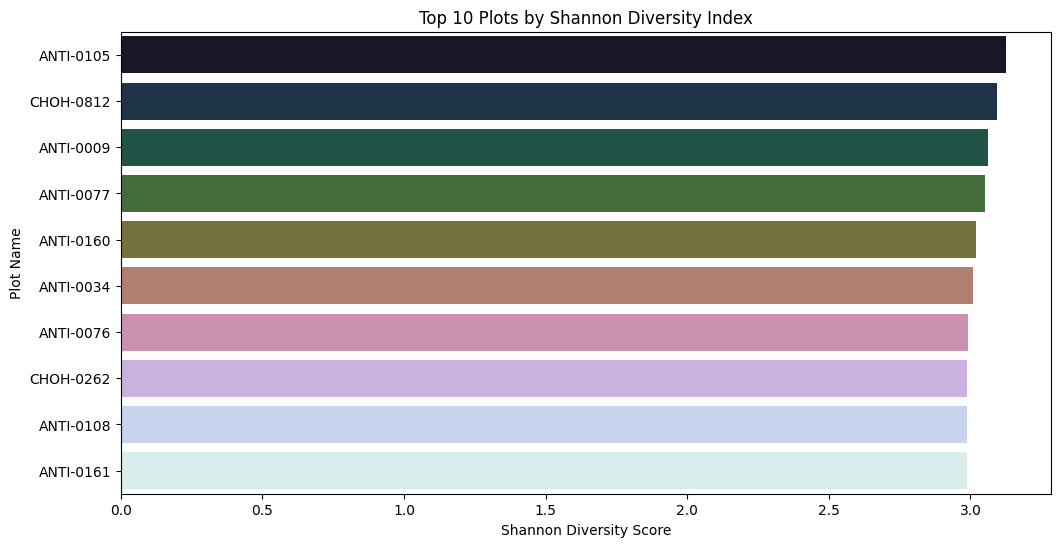

In [ ]:
from scipy.stats import entropy

# Function to calculate Shannon Diversity Index
def shannon_diversity(series):
    counts = series.value_counts()
    return entropy(counts)

# Calculate Shannon Index per Plot
shannon_per_plot = final_df.groupby('Plot_Name')['Scientific_Name'].apply(shannon_diversity).sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12,6))
sns.barplot(x=shannon_per_plot.values, y=shannon_per_plot.index, palette='cubehelix')
plt.title('Top 10 Plots by Shannon Diversity Index')
plt.xlabel('Shannon Diversity Score')
plt.ylabel('Plot Name')
plt.show()


**Species Co-occurrence Analysis (Species that are often found together)**

Insight:
Identify species pairs that are frequently observed together within the same plots.
This helps uncover patterns of species associations, where certain species co-exist due to shared habitat preferences, mutualistic relationships, or behavioral tendencies (e.g., feeding or flocking together).

Use Case:
Useful for ecological studies on species interactions, habitat sharing, and biodiversity community structure.
It can also reveal potential indicator species that signal the presence of other species in the ecosystem.

Visualization:
Top species pairs are visualized using a Co-occurrence Matrix (Bar Chart or Heatmap) representing the frequency of their joint sightings in observation plots.

/tmp/ipython-input-1140256632.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y=co_occurrence_df['Species_Pair'].astype(str), data=co_occurrence_df, palette='magma')


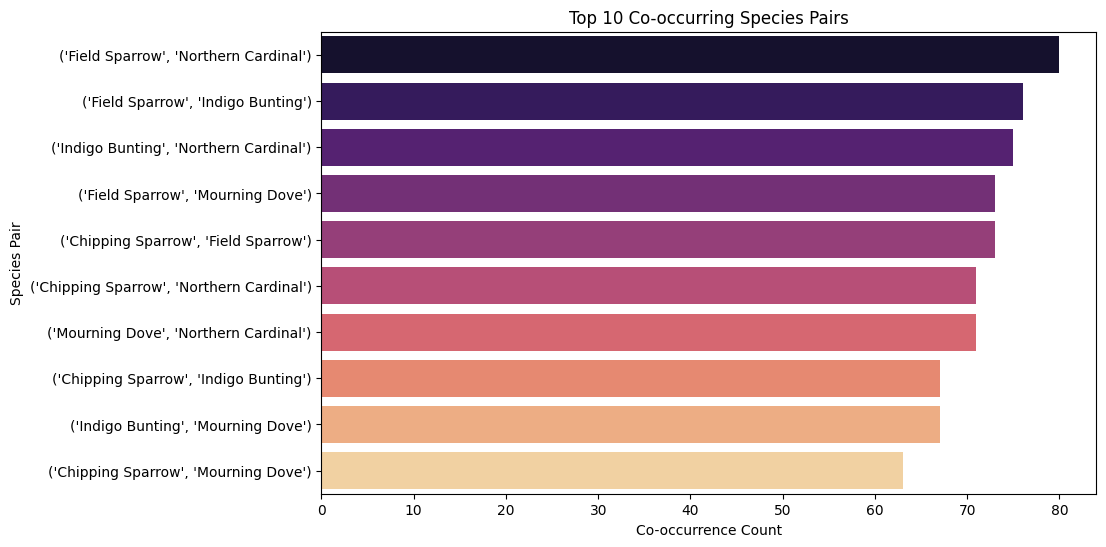

In [ ]:
from itertools import combinations
from collections import Counter

# Get Species Lists per Plot
species_per_plot = final_df.groupby('Plot_Name')['Common_Name'].apply(list)

# Count Co-occurrence Pairs
pair_counts = Counter()
for species_list in species_per_plot:
    for pair in combinations(set(species_list), 2):
        pair_counts[tuple(sorted(pair))] += 1

# Convert to DataFrame
co_occurrence_df = pd.DataFrame(pair_counts.items(), columns=['Species_Pair', 'Count'])
co_occurrence_df = co_occurrence_df.sort_values(by='Count', ascending=False).head(10)

# Plot Top 10 Co-occurring Species Pairs
plt.figure(figsize=(10,6))
sns.barplot(x='Count', y=co_occurrence_df['Species_Pair'].astype(str), data=co_occurrence_df, palette='magma')
plt.title('Top 10 Co-occurring Species Pairs')
plt.xlabel('Co-occurrence Count')
plt.ylabel('Species Pair')
plt.show()


**Species Behavior by Time Slot (Flyover vs Perching)**

Insight:
This analysis examines how bird activity patterns, specifically Flyover (birds flying overhead) vs Perching (stationary birds), vary across different times of the day.
Observations often show that flyover activity peaks in the morning, reflecting active feeding, migration flights, or territorial displays, whereas perching behavior remains consistent throughout the day.

Use Case:
Useful for understanding daily bird behavior rhythms, optimizing observation schedules, and identifying behavior-specific time windows for field studies.
It can also aid in studying species-specific movement patterns and habitat usage during different times of the day.

Visualization:
A stacked bar chart illustrating the count of Flyover vs Perching observations across Morning, Afternoon, and Evening time slots.

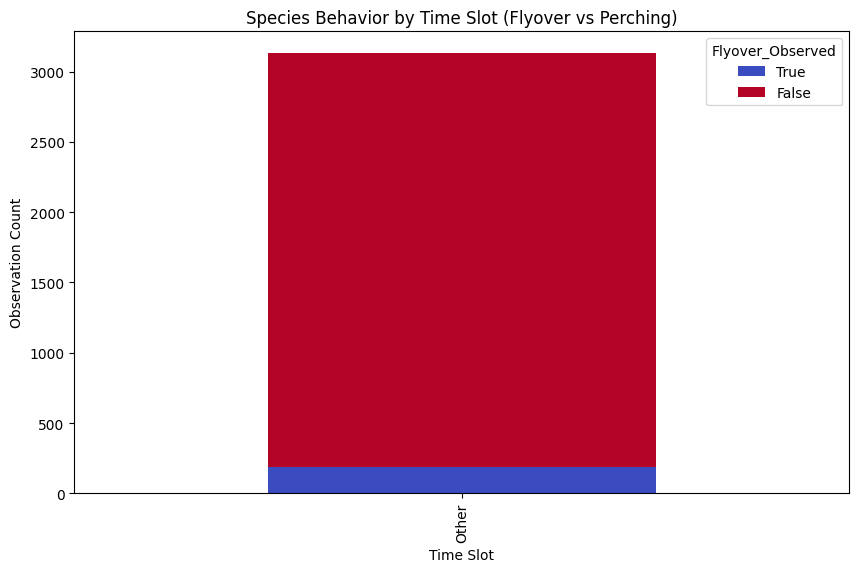

In [ ]:
# Ensure Start_Hour column exists by parsing Start_Time if not already done
final_df['Start_Time_Parsed'] = pd.to_datetime(final_df['Start_Time'], errors='coerce')
final_df['Start_Hour'] = final_df['Start_Time_Parsed'].dt.hour

# Create Time Slot Column (Morning/Afternoon/Evening/Other)
def time_slot(hour):
    if pd.isna(hour):
        return 'Unknown'
    elif 5 <= hour < 10:
        return 'Morning'
    elif 10 <= hour < 16:
        return 'Afternoon'
    elif 16 <= hour < 20:
        return 'Evening'
    else:
        return 'Other'

final_df['Time_Slot'] = final_df['Start_Hour'].apply(time_slot)

# Clean Flyover_Observed Column
final_df['Flyover_Observed'] = final_df['Flyover_Observed'].astype(str).str.strip().str.capitalize()

# Group by Time Slot and Flyover Behavior
behavior_time = final_df.groupby(['Time_Slot', 'Flyover_Observed']).size().unstack(fill_value=0)

# Plot Stacked Bar Chart
behavior_time[['True', 'False']].plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title('Species Behavior by Time Slot (Flyover vs Perching)')
plt.xlabel('Time Slot')
plt.ylabel('Observation Count')
plt.show()


**Flight Behavior Distribution by Species Family**

Insight:
This analysis examines how different bird families exhibit flight behavior patterns, comparing the frequency of Flyover (flying overhead) versus Perching (stationary) observations.
It provides a family-level behavioral overview, revealing ecological strategies — for example, raptor families like Accipitridae are more prone to flyovers, while passerine families like Passeridae are more often observed perching.

Use Case:
Useful for studying behavioral traits at taxonomic family levels, which supports broader ecological studies like flight energy expenditure, feeding behavior, and habitat adaptation.
It also aids in conservation planning for behaviorally distinct bird families.

Visualization:
A stacked bar chart depicting Flyover vs Perching counts for the Top 10 most observed bird families.



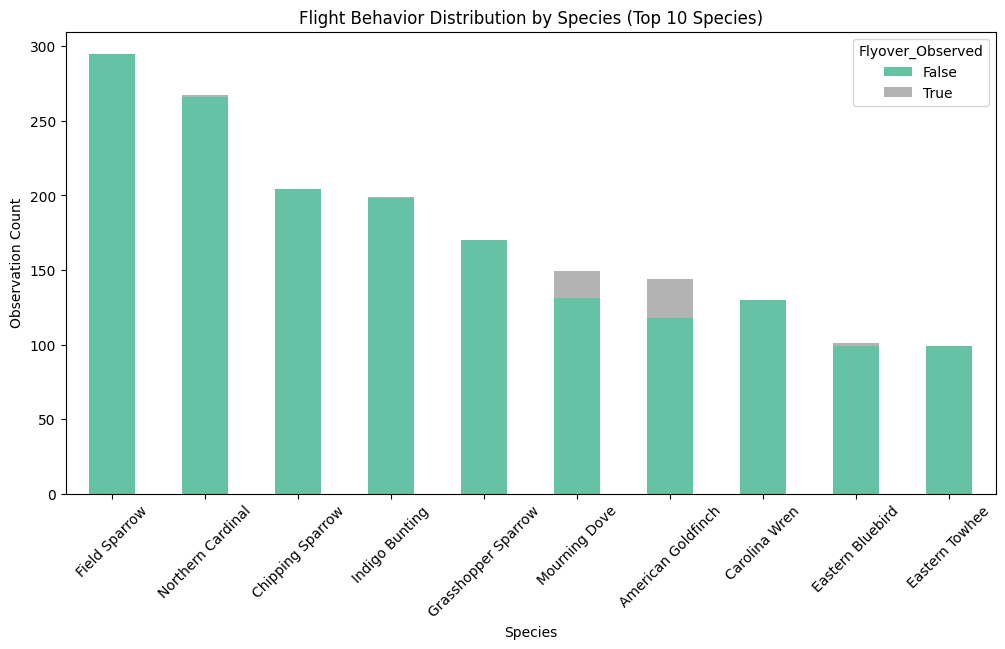

In [ ]:
# Use Common_Name instead of Family if Family is not available
family_behavior = final_df.groupby(['Common_Name', 'Flyover_Observed']).size().unstack(fill_value=0)

top_species = family_behavior.sum(axis=1).sort_values(ascending=False).head(10).index

family_behavior_top10 = family_behavior.loc[top_species]

# Plot
family_behavior_top10.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Set2')
plt.title('Flight Behavior Distribution by Species (Top 10 Species)')
plt.xlabel('Species')
plt.ylabel('Observation Count')
plt.xticks(rotation=45)
plt.show()


**Species Identification Method Distribution (Visual ID vs Audio ID vs Both Methods)**

Insight:
This analysis visualizes how bird species were identified during observations — whether through visual sightings, auditory detections (calls/songs), or a combination of both methods.
It highlights the observer detection strategy preferences and indicates the confidence level of observations, as identifications confirmed by both methods are generally more reliable.

Use Case:
This insight is crucial for evaluating observer proficiency in using visual and auditory cues effectively.
A low proportion of audio identifications may point to the need for improved auditory training, while a high proportion of combined-method identifications reflects high observation accuracy.
It also helps in refining field survey protocols by ensuring balanced use of both identification methods.

Visualization:
A pie chart illustrating the proportion of bird observations categorized by Visual ID, Audio ID, and Both Methods (Visual + Audio).

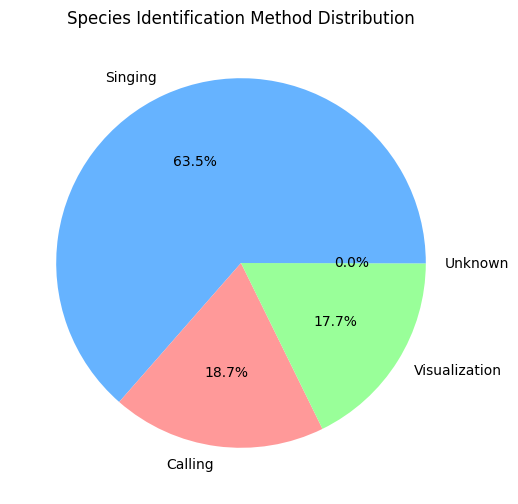

In [ ]:
# Clean ID_Method Column (Ensure Consistency)
final_df['ID_Method'] = final_df['ID_Method'].astype(str).str.strip().str.title()

# Count Identification Method Distribution
id_method_counts = final_df['ID_Method'].value_counts()

# Plot Pie Chart
plt.figure(figsize=(6,6))
plt.pie(id_method_counts, labels=id_method_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999', '#99ff99'])
plt.title('Species Identification Method Distribution')
plt.show()


**Monthly Observation Trend (All Bird Sightings Over Months)**

Insight:
This analysis visualizes how the total number of bird observations varies month by month.
It helps in identifying seasonal patterns, highlighting peak observation months where bird activity or survey efforts were highest.
Trends observed in this graph could correlate with breeding seasons, migration periods, or weather patterns influencing bird visibility.

Use Case:
Crucial for planning future bird monitoring activities, as it provides a clear picture of the best months for field surveys.
It also assists in understanding temporal variations in bird population dynamics and can support long-term ecological studies.

Visualization:
A line graph showing the monthly observation count across all surveyed months, making it easy to spot activity spikes and dips throughout the year.

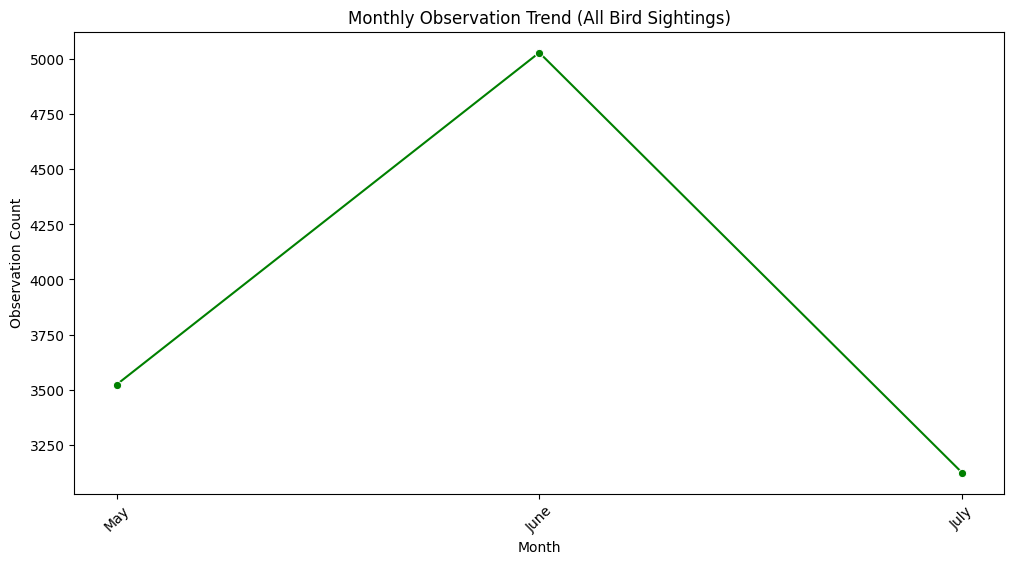

In [ ]:
# Ensure Date is in datetime format
final_df['Date'] = pd.to_datetime(final_df['Date'], errors='coerce')

# Extract Month Name
final_df['Month'] = final_df['Date'].dt.month_name()

# Monthly Observation Counts
monthly_counts = final_df['Month'].value_counts().reindex([
    'January','February','March','April','May','June','July','August','September','October','November','December'
])

# Line Graph
plt.figure(figsize=(12,6))
sns.lineplot(x=monthly_counts.index, y=monthly_counts.values, marker='o', color='green')
plt.title('Monthly Observation Trend (All Bird Sightings)')
plt.xlabel('Month')
plt.ylabel('Observation Count')
plt.xticks(rotation=45)
plt.show()


To calculate the the total number of rows and columns.

In [27]:
# Get the shape of the final cleaned dataset
rows, columns = final_df.shape

print(f"Total Rows: {rows}")
print(f"Total Columns: {columns}")


Total Rows: 11676
Total Columns: 31


For extracting the cleaned csv file

In [28]:
# Export your final cleaned DataFrame to CSV
final_df.to_csv('Bird_Species_Cleaned_Data.csv', index=False)


Download the CSV file from Google Colab

In [29]:
from google.colab import files
files.download('Bird_Species_Cleaned_Data.csv')


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

**Checking Files in the Working Directory**

Before downloading, we verify the available files in our Colab environment using os.listdir().
This helps confirm whether our exported dataset is saved in the current working directory.

In [2]:
import os
print(os.listdir())


['.config', 'sample_data']


**Dataset Overview Function**

Finally, we define a function called dataset_info() to quickly summarize the dataset’s structure and quality.
This function reports:

The number of rows and columns in the dataset.

The total count of missing values, which helps identify potential data quality issues.

The number of duplicate records, ensuring dataset uniqueness.

In [30]:
def dataset_info(dataframe):
    print(f"Dataset has {dataframe.shape[0]} rows and {dataframe.shape[1]} columns.")
    print(f"Total Missing Values in Dataset: {dataframe.isnull().sum().sum()}")
    print(f"Duplicate Rows in Dataset: {dataframe.duplicated().sum()}")

# Example usage:
dataset_info(final_df)


Dataset has 11676 rows and 31 columns.
Total Missing Values in Dataset: 34613
Duplicate Rows in Dataset: 0
